# Ejercicio 1 - XOR with NNet in python

1. Resolver el problema de la XOR con 3 neuronas:
    
    a. Implementar SGD para resolver la XOR
    
    b. Cuantos parametros desconocidos tiene el modelo?
    
    c. ¿Cuáles son los hiper-parámetros del modelo?
    Explicar que pasa cuando se varía el learning rate.
    
    d. Una vez entrenado el modelo, realizar predicciones para verificar el funcionamiento.


## a) XOR implementado con SGD se encuentra en utils/XOR.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('..')
from utils.XOR import XOR

### Entrenando el modelo

In [2]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

| X1 | X2 | y = X1 XOR X2 |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [3]:
xor_obj = XOR(n_epochs=5000, lr=0.1)
xor_obj.train(X, y)

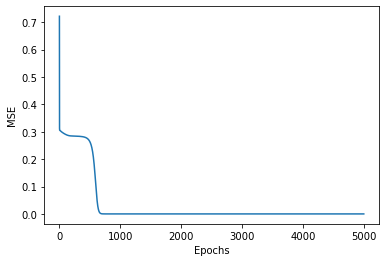

In [4]:
plt.plot(xor_obj.MSE)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

## b) Cuantos parametros desconocidos tiene el modelo?

Como tenemos 3 neuronas y cada una tiene los W que dependen de sus entradas + el bias, tenemos 9 parametros desconocidos.

![RESOLUCIÓN DEL TRABAJO PRÁCTICO 1](../img/params.png)

## c) ¿Cuáles son los hiper-parámetros del modelo? Explicar que pasa cuando se varía el learning rate.

Los hiper-parámetros del modelo son:

* n_epochs (el numero de epochs)
* lr (el learning rate)

El learning rate maneja que tan rapido el modelo aprende. 

* Un LR alto hace saltos grandes para encontrar el gradiente y requiere menos epochs pero si es muy alto puede hacer que el modelo converga muy rapido y llegue a una solucion no optima.
* Un LR chiquito requiere mas epochs para entrenar, pero si es muy chiquito se puede quedar trabado en una solucion no optima tambien.

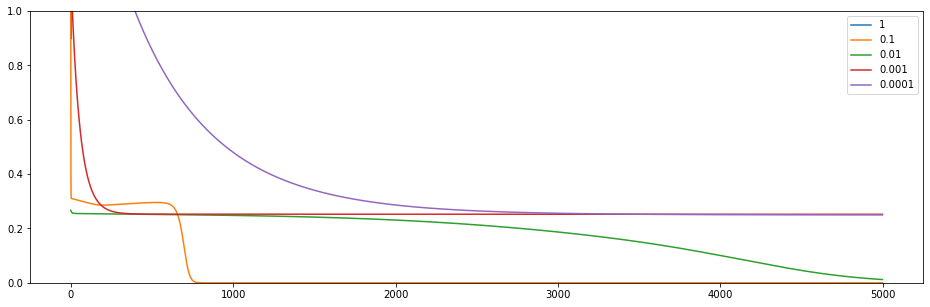

In [5]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
models = [XOR(n_epochs=5000, lr=LR) for LR in learning_rates]

fig, ax = plt.subplots(1,1,figsize=(16,5))
for model in models:
    model.train(X, y)
    ax.plot(model.MSE, label=model.lr)
    
ax.legend(loc="upper right")
ax.set_ylim(0,1)
plt.show()

## d) Una vez entrenado el modelo, realizar predicciones para verificar el funcionamiento.

In [6]:
assert xor_obj.predict([1, 0]) == 1
assert xor_obj.predict([0, 0]) == 0
assert xor_obj.predict([0, 1]) == 1
assert xor_obj.predict([1, 1]) == 0